# Classification

Classification kita gunakan saat mempunyai data awal dengan kategori2nya, dan kita mau buat prediksi data yang baru kira2 masuk kategori apa.

Jadi kita buat model tipe classification, latih dengan data awal kita, dan kita gunakan untuk membuat prediksi tersebut.

- Logistic Regression
- K-Nearest Neighbor

In [97]:
#import package

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [9]:
# Logistic Regression
# import data
# untuk contoh kali ini, kita import data buatan dari https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

df_data = pd.read_csv("dataset/gender_classification_v7.csv")
display(df_data.head(2))
df_data.info()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [12]:
# rapiin data

# ubah kolom gender (target) jadi numerik
# replace --> maksa ubah sebuah value jadi value lain, per jenis target kita ubah satu2
# encoding --> lebih automated, setiap value berbeda di assign ke satu integer
le = LabelEncoder()
df_data["gender"] = le.fit_transform(df_data["gender"])

print(le.classes_)
df_data.head(3)


['Female' 'Male']


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1


In [13]:
# tidak ada missing value

# split data jadi training dan testing dataset

# pisahin data yg digunakan untuk fitur, dan untuk target
features = df_data.drop(columns=["gender"])
target = df_data["gender"]

print(features.shape, target.shape)

# kita lanjut ke pembuatan model

(5001, 7) (5001,)


In [14]:
# buat dan latih model
model = LogisticRegression()

model.fit(features, target)

LogisticRegression()

In [16]:
# evaluasi keakuratan model
y_pred = model.predict(features)

print(classification_report(target, y_pred))



              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2501
           1       0.97      0.97      0.97      2500

    accuracy                           0.97      5001
   macro avg       0.97      0.97      0.97      5001
weighted avg       0.97      0.97      0.97      5001



In [17]:
confusion_matrix(target, y_pred)

array([[2422,   79],
       [  78, 2422]], dtype=int64)

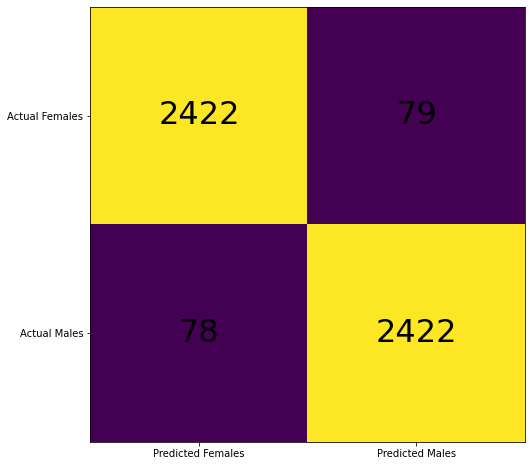

In [19]:
# visualisasi confusion matrix
cm = confusion_matrix(target, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Females', 'Predicted Males'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Females', 'Actual Males'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=32)
plt.show()

In [24]:
# pakai model untuk buat prediksi
# 'long_hair' 0-1
# 'forehead_width_cm' 11.4-15.5
# 'forehead_height_cm' 5.1-7.1
# 'nose_wide' 0-1
# 'nose_long' 0-1
# 'lips_thin' 0-1
# 'distance_nose_to_lip_long' 0-1

orang = [[0, 12, 6, 0, 0, 0, 1]]
model.predict(orang)

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [25]:
model.classes_

array([0, 1])

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2501
           1       0.97      0.97      0.97      2500

    accuracy                           0.97      5001
   macro avg       0.97      0.97      0.97      5001
weighted avg       0.97      0.97      0.97      5001



c:\Users\stefa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


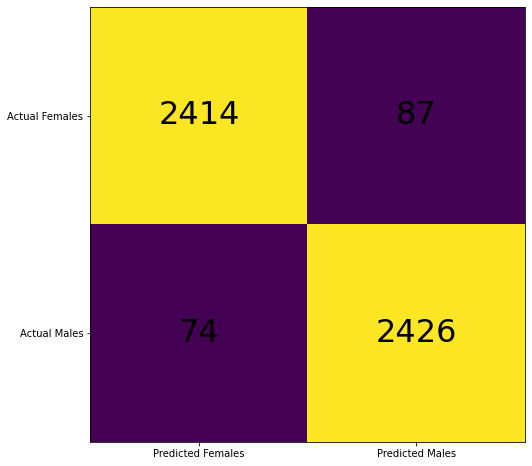

In [28]:
# tuning - balik ke step2 sebelum untuk buat model lebih akurat
# buat dan latih model, dengan opsi2 untuk lebih akurat
model2 = LogisticRegression(solver="sag", C=10, random_state=0)

model2.fit(features, target)

# evaluasi keakuratan model
y_pred2 = model2.predict(features)

print(classification_report(target, y_pred2))

# visualisasi confusion matrix
cm = confusion_matrix(target, y_pred2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Females', 'Predicted Males'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Females', 'Actual Males'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=32)
plt.show()

In [38]:
# optional - visualisasi hasil garis logistic regression

# supaya bisa visualisasi di grafik 2 dimensi, kita buat model yang cuma punya 1 fitur
# dan 1 target, fitur di x-axis, target di y-axis

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

model3 = LogisticRegression()
model3.fit(x,y)

LogisticRegression()

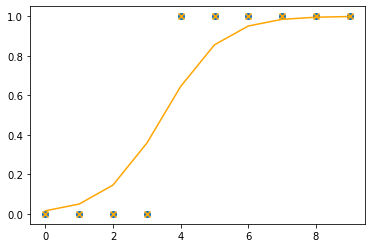

In [46]:
plt.scatter(x, y)

plt.plot(x, model3.predict_proba(x).T[1], color="orange")
plt.scatter(x, model3.predict(x), color="orange", marker="x")

In [42]:
model3.predict_proba(x).T[1]

array([0.01588797, 0.04996926, 0.14629064, 0.35826454, 0.64524127,
       0.8556076 , 0.95075124, 0.98434921, 0.99514341, 0.99850427])

In [45]:
model3.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [52]:
# contoh classification dengan data gambar

# import data
x, y = load_digits(return_X_y=True)

print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


(-0.5, 7.5, 7.5, -0.5)

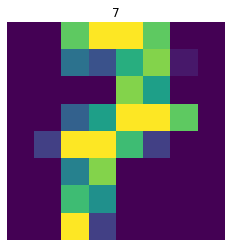

In [61]:
# optional - visualisasi data awal kita
n = 1200
plt.imshow(x[n].reshape((8,8)))
plt.title(y[n])
plt.axis("off")

In [73]:
# siapin data
# tidak ada missing value
# data sudah numerik semua
# pisahin jadi training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.2)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

print(y_train[:5])

(1437, 64) (360, 64)
(1437,) (360,)
[9 4 4 1 6]


In [74]:
# scale data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [75]:
# buat dan latih model
model_digits = LogisticRegression()
model_digits.fit(x_train_scaled, y_train)

LogisticRegression()

In [76]:
# evaluasi keakuratan data
y_pred = model_digits.predict(x_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      0.97      0.97        32
           2       1.00      1.00      1.00        41
           3       0.97      1.00      0.98        32
           4       1.00      0.94      0.97        36
           5       0.97      0.97      0.97        35
           6       1.00      0.97      0.99        40
           7       1.00      0.97      0.99        39
           8       0.83      0.93      0.88        27
           9       0.94      0.94      0.94        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



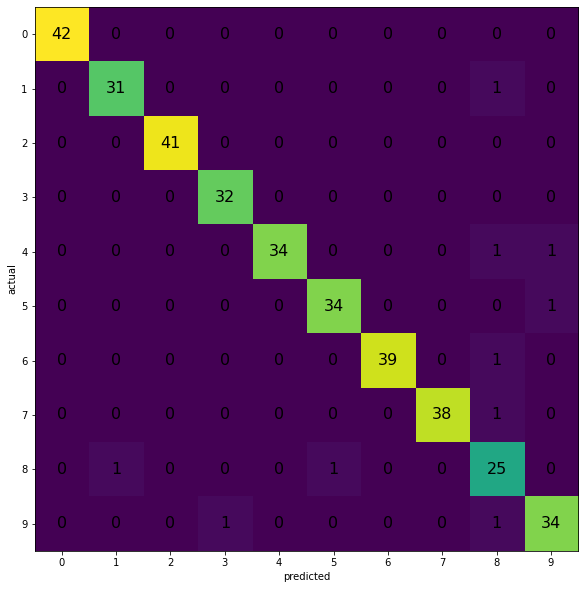

In [81]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)

nums_label = []
nums = []
for n in range(10):
    nums.append(n)
    nums_label.append(str(n))

ax.xaxis.set(ticks=nums, ticklabels=nums_label)
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=nums, ticklabels=nums_label)
ax.set_ylabel("actual")

ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=16)
plt.show()

In [82]:
# KNN
# K-Nearest Neighbor
# K nya kita yang pilih, mau berapa tetangga yang dijadikan panduan kalau orang baru kategori apa

# siapin data

# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target variable
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [83]:
# rapikan data
# karena data kita string semua, kita encoding jadi numerik

le = LabelEncoder()
weather_en = le.fit_transform(weather)
print(le.classes_)

temp_en = le.fit_transform(temp)
print(le.classes_)

play_en = le.fit_transform(play)
print(le.classes_)

['Overcast' 'Rainy' 'Sunny']
['Cool' 'Hot' 'Mild']
['No' 'Yes']


In [86]:
df_play = pd.DataFrame({"weather":weather_en, "temp":temp_en, "play":play_en})
print(df_play.shape)

fitur = df_play[["weather", "temp"]]
target = df_play["play"]

(14, 3)


In [87]:
# skip split
# skip scaling
# tidak ada missing value

# lanjut ke pembuatan dan pelatihan model

In [99]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(fitur, target)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.80      0.89      0.84         9

    accuracy                           0.79        14
   macro avg       0.78      0.74      0.75        14
weighted avg       0.78      0.79      0.78        14

0.7857142857142857


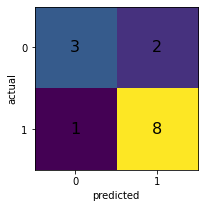

In [102]:
# evaluasi
y_pred = model_knn.predict(fitur)

print(classification_report(target, y_pred))

print(accuracy_score(target, y_pred))

cm = confusion_matrix(target, y_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1))
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=(0,1))
ax.set_ylabel("actual")
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=16)
plt.show()

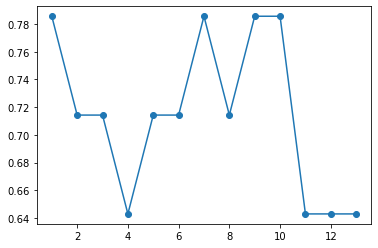

In [107]:
# KNN biasanya kita mau bandingin untuk setiap jumlah K berbeda
# mana yang paling akurat

scores = []
for k in range(1, len(df_play)):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(fitur, target)

    y_pred = model_knn.predict(fitur)

    scores.append(accuracy_score(target, y_pred))

plt.plot(range(1, len(df_play)), scores, marker="o")

In [109]:
# KNN dengan multiple label
# kita gunakan data load_digits

print(x.shape, y.shape)

(1797, 64) (1797,)


In [110]:
# siapin data
# training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

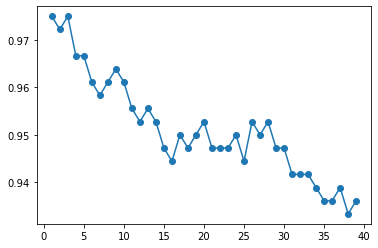

In [111]:

# kita lanjut ke training model
# cek akurasi per jumlah k untuk bisa tentukan jumlah k yang baik

scores = []
for k in range(1, 40):
    model_knn_digits = KNeighborsClassifier(n_neighbors=k)
    model_knn_digits.fit(x_train_scaled, y_train)

    y_pred = model_knn_digits.predict(x_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1,40), scores, marker="o")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        34
           3       0.95      0.97      0.96        40
           4       1.00      0.97      0.99        34
           5       0.97      0.94      0.95        32
           6       0.97      1.00      0.99        37
           7       1.00      1.00      1.00        40
           8       0.94      0.94      0.94        33
           9       0.97      0.92      0.95        39

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



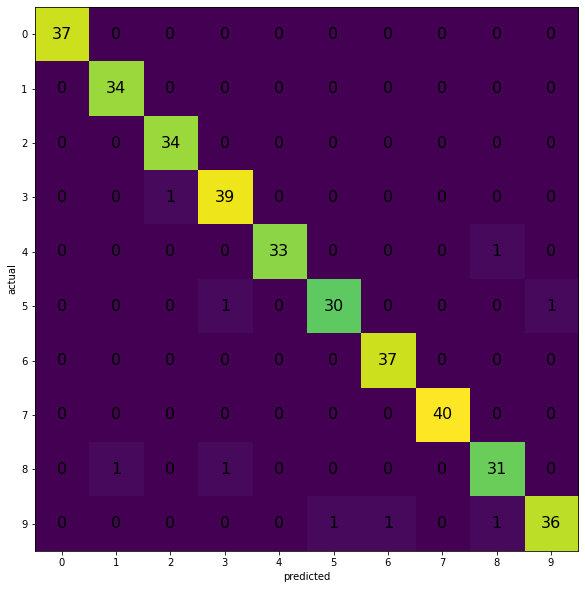

In [112]:
# misal kita pilih k = 3
k = 3
model_knn_digits = KNeighborsClassifier(n_neighbors=k)
model_knn_digits.fit(x_train_scaled, y_train)

# evaluasi keakuratan model
y_pred = model_knn_digits.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)

nums_label = []
nums = []
for n in range(10):
    nums.append(n)
    nums_label.append(str(n))

ax.xaxis.set(ticks=nums, ticklabels=nums_label)
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=nums, ticklabels=nums_label)
ax.set_ylabel("actual")

ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=16)
plt.show()